# Import Libraries and Dataset

In [70]:
# Import Libraries and Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [71]:
nltk.download('punkt_tab')
nltk.download('stopwords')



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_val = pd.read_csv('/content/val.csv')

In [73]:
df_train.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive


In [74]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     500 non-null    int64 
 1   user_handle  500 non-null    object
 2   timestamp    500 non-null    object
 3   tweet_text   500 non-null    object
 4   candidate    500 non-null    object
 5   party        500 non-null    object
 6   retweets     500 non-null    int64 
 7   likes        500 non-null    int64 
 8   sentiment    500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [75]:
df_train.shape

(500, 9)

In [76]:
df_test.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,501,@user1068,2025-02-11 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,85,320,positive
1,502,@politicsNew2,2025-02-11 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,100,450,positive
2,503,@greenVisionary2,2025-02-11 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,60,200,positive
3,504,@indieWatcher2,2025-02-11 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,30,120,neutral
4,505,@libertyFan4,2025-02-11 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,50,160,positive


In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     50 non-null     int64 
 1   user_handle  50 non-null     object
 2   timestamp    50 non-null     object
 3   tweet_text   50 non-null     object
 4   candidate    50 non-null     object
 5   party        50 non-null     object
 6   retweets     50 non-null     int64 
 7   likes        50 non-null     int64 
 8   sentiment    50 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.6+ KB


In [78]:
df_test.shape

(50, 9)

In [79]:
df_val.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,551,@user1077,2025-02-21 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,85,320,positive
1,552,@politicsNew3,2025-02-21 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,100,450,positive
2,553,@greenVisionary3,2025-02-21 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,60,200,positive
3,554,@indieWatcher3,2025-02-21 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,30,120,neutral
4,555,@libertyFan5,2025-02-21 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,50,160,positive


In [80]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     50 non-null     int64 
 1   user_handle  50 non-null     object
 2   timestamp    50 non-null     object
 3   tweet_text   50 non-null     object
 4   candidate    50 non-null     object
 5   party        50 non-null     object
 6   retweets     50 non-null     int64 
 7   likes        50 non-null     int64 
 8   sentiment    50 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.6+ KB


In [81]:
df_val.shape

(50, 9)

# EDA

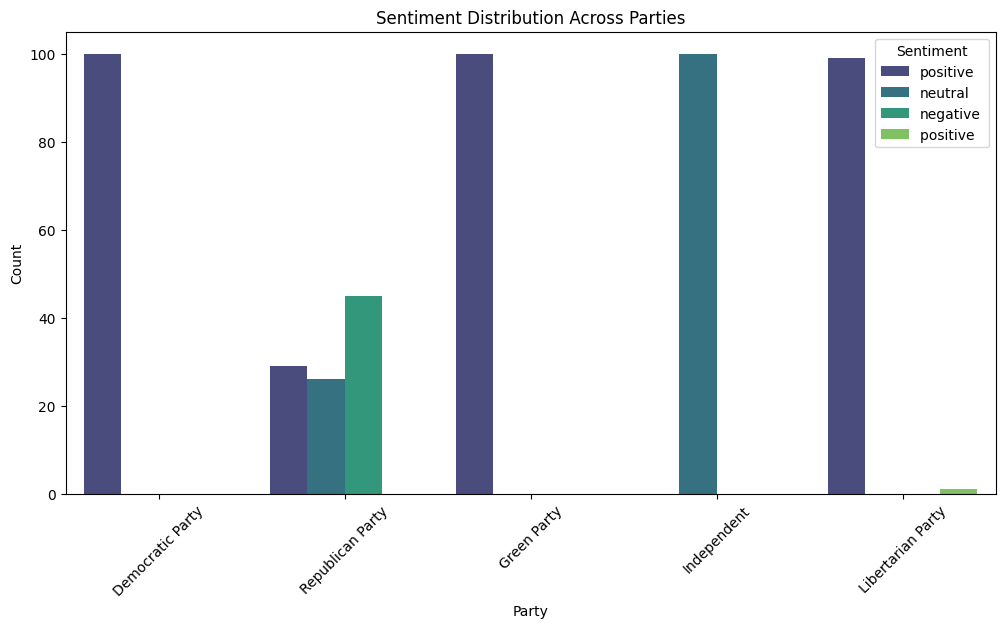

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='party', hue='sentiment', data=df_train, palette='viridis')
plt.title('Sentiment Distribution Across Parties')
plt.xlabel('Party')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

In [34]:
df_train.head(50)

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment,month_year
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive,2024-11
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive,2024-11
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive,2024-11
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral,2024-11
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive,2024-11
5,6,@user456,2024-11-04 08:50:30,Kamala Harris has been a strong advocate for h...,Kamala Harris,Democratic Party,95,380,positive,2024-11
6,7,@econGuru,2024-11-04 09:25:10,Trump's tax policies will benefit small busine...,Donald Trump,Republican Party,110,500,positive,2024-11
7,8,@ecoWarrior,2024-11-04 10:15:20,Jill Stein's green initiatives could save our ...,Jill Stein,Green Party,70,250,positive,2024-11
8,9,@neutralNow,2024-11-04 11:45:00,Robert Kennedy is running as an independent; i...,Robert Kennedy,Independent,25,100,neutral,2024-11
9,10,@freedomFirst,2024-11-04 12:55:35,Chase Oliver promotes minimal government inter...,Chase Oliver,Libertarian Party,50,180,positive,2024-11


In [50]:
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_val['timestamp'] = pd.to_datetime(df_val['timestamp'])


In [103]:
print("Earliest Timestamp:", df_train['timestamp'].min())
print("Latest Timestamp:", df_train['timestamp'].max())


Earliest Timestamp: 2024-01-01 08:20:35
Latest Timestamp: 2024-12-31 12:35:40


In [102]:
def analyze_canidate_sentiment(df):
    # Convert the timestamp column to datetime objects if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Filter rows containing "Donald Trump" or "Donald J. Trump" (case-insensitive)
    trump_mentions = df[df['candidate'].str.contains("Donald Trump|Donald J. Trump", case=False, na=False)]

    monthly_sentiments = {}
    for month in range(1, 13):  # Iterate through months 1 to 12
        month_data = trump_mentions[trump_mentions['timestamp'].dt.month == month]

        if not month_data.empty:
            sentiment_counts = month_data['sentiment'].value_counts()
            negative_count = sentiment_counts.get('negative', 0)
            total_count = len(month_data)
            negative_proportion = (negative_count / total_count) * 100 if total_count else 0
            monthly_sentiments[month] = negative_proportion
        else:
            monthly_sentiments[month] = "No data"
    return monthly_sentiments


results = analyze_canidate_sentiment(df_train)

# Print the results
month_names = ["January", "February", "March", "April", "May", "June",
              "July", "August", "September", "October", "November", "December"]
for month, proportion in results.items():
    print(f"{month_names[month-1]}: {proportion:.2f}%" if isinstance(proportion, (int, float)) else f"{month_names[month-1]}: {proportion}")


January: 41.94%
February: 40.00%
March: No data
April: No data
May: No data
June: No data
July: No data
August: No data
September: No data
October: No data
November: 42.86%
December: 51.61%


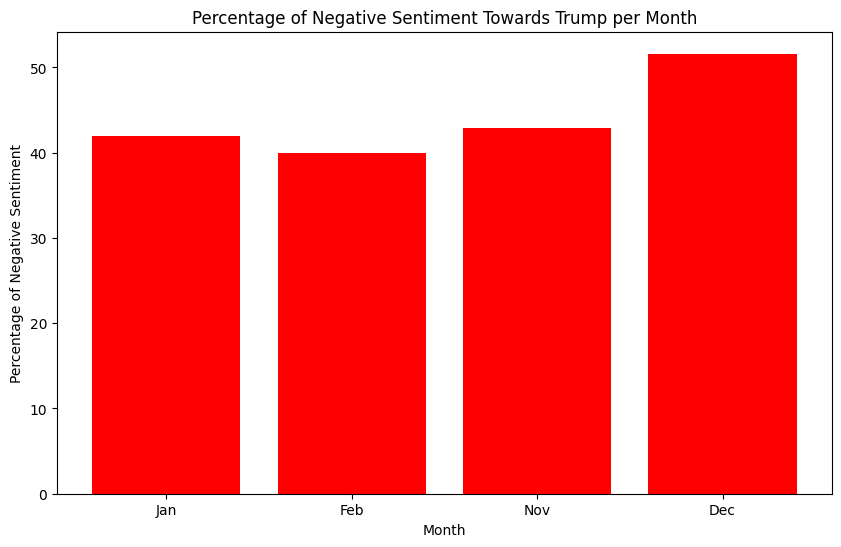

In [101]:
import matplotlib.pyplot as plt

results = analyze_canidate_sentiment(df_train)

# Prepare data for plotting (exclude months with "No data")
months_with_data = {month: proportion for month, proportion in results.items() if isinstance(proportion, (int, float))}
months = list(months_with_data.keys())
percentages = list(months_with_data.values())
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_labels = [month_names[month-1] for month in months]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(month_labels, percentages, color='red')
plt.xlabel("Month")
plt.ylabel("Percentage of Negative Sentiment")
plt.title("Percentage of Negative Sentiment Towards Trump per Month")
plt.show()


# Data Preprocessing

Dataset was already cleaned, but I will add these additional steps for practice and in case anything was missed

In [ ]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|\#', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmas)


# Apply preprocessing to the text column
df_train['tweet_text'] = df_train['tweet_text'].apply(preprocess_text)
df_test['tweet_text'] = df_test['tweet_text'].apply(preprocess_text)
df_val['tweet_text'] = df_val['tweet_text'].apply(preprocess_text)


In [ ]:
def print_tokens(text):
    tokens = nltk.word_tokenize(text)
    print(tokens)

# Apply the function to the 'tweet_text' column
df_train['tweet_text'].apply(print_tokens)


['Excited', 'see', 'Kamala', 'Harris', 'leading', 'Democratic', 'charge']
['Donald', 'Trumps', 'policy', 'best', 'economy']
['Jill', 'Steins', 'environmental', 'plan', 'exactly', 'need']
['Robert', 'Kennedy', 'offer', 'fresh', 'perspective', 'outside', 'twoparty', 'system']
['Chase', 'Olivers', 'libertarian', 'stance', 'promotes', 'true', 'freedom']
['Kamala', 'Harris', 'strong', 'advocate', 'healthcare', 'reform']
['Trumps', 'tax', 'policy', 'benefit', 'small', 'business']
['Jill', 'Steins', 'green', 'initiative', 'could', 'save', 'planet']
['Robert', 'Kennedy', 'running', 'independent', 'interesting', 'choice']
['Chase', 'Oliver', 'promotes', 'minimal', 'government', 'intervention', 'Love']
['Kamala', 'Harris', 'tackling', 'education', 'issue', 'headon']
['Trumps', 'latest', 'policy', 'could', 'lower', 'tax', 'middle', 'class']
['Jill', 'Steins', 'renewable', 'energy', 'plan', 'ambitious']
['Robert', 'Kennedy', 'might', 'disrupt', 'traditional', 'party', 'dynamic']
['Chase', 'Olivers

,tweet_text
0,None
1,None
2,None
3,None
4,None
...,...
495,None
496,None
497,None
498,None


In [ ]:
pd.set_option('display.max_colwidth', None)
print(df_train['tweet_text'])


0                 excited see kamala harris leading democratic charge
1                                    donald trump policy best economy
2                          jill stein environmental plan exactly need
3      robert kennedy offer fresh perspective outside twoparty system
4               chase oliver libertarian stance promotes true freedom
                                    ...                              
495                       kamala harris symbol progressive leadership
496                      trump economic strategy showing mixed result
497             jill stein solar project leading way renewable energy
498        robert kennedy offer pragmatic solution outside party line
499               chase oliver expanding base among libertarian voter
Name: tweet_text, Length: 500, dtype: object


# Sentiment Analysis

<Axes: xlabel='sentiment'>

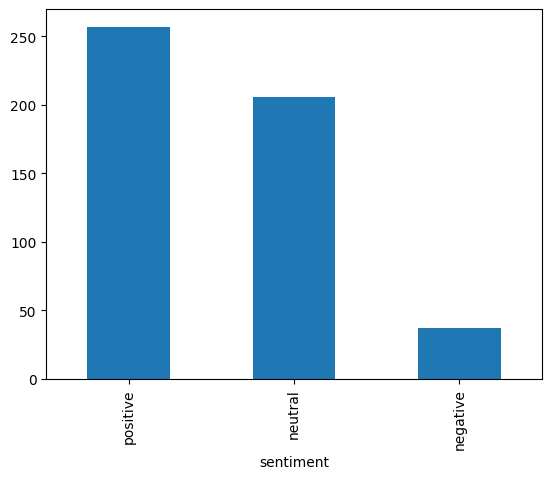

In [ ]:
df_train['sentiment'].value_counts().plot(kind='bar')

In [ ]:
# Prepare data
X = df_train['tweet_text']
y = df_train['sentiment']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# SVM Classifier with Hyperparameter Tuning
svm_model = SVC()
param_grid = {
    'C': [0.1, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1], # Kernel coefficient
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_vec, y_train)

best_svm_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the model
y_pred = best_svm_model.predict(X_val_vec)
print(classification_report(y_val, y_pred))


Fitting 5 folds for each of 88 candidates, totalling 440 fits
Best Hyperparameters: {'C': 3, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

    negative       1.00      0.75      0.86         8
     neutral       0.95      0.90      0.93        41
    positive       0.89      0.96      0.92        51

    accuracy                           0.92       100
   macro avg       0.95      0.87      0.90       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
# Logistic Regression Classifier with Hyperparameter Tuning
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter
param_grid_logreg = {
    'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga'] # Solver algorithm
}

grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_logreg.fit(X_train_vec, y_train)

best_logreg_model = grid_search_logreg.best_estimator_
print(f"Best Hyperparameters for Logistic Regression: {grid_search_logreg.best_params_}")

# Evaluate the Logistic Regression model
y_pred_logreg = best_logreg_model.predict(X_val_vec)
print(classification_report(y_val, y_pred_logreg))


Fitting 5 folds for each of 44 candidates, totalling 220 fits
Best Hyperparameters for Logistic Regression: {'C': 6, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

    negative       1.00      0.75      0.86         8
     neutral       0.93      0.93      0.93        41
    positive       0.91      0.94      0.92        51

    accuracy                           0.92       100
   macro avg       0.94      0.87      0.90       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
# Random Forest Classifier with Hyperparameter Tuning
rf_model = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train_vec, y_train)

best_rf_model = grid_search_rf.best_estimator_
print(f"Best Hyperparameters for Random Forest: {grid_search_rf.best_params_}")

# Evaluate the Random Forest model
y_pred_rf = best_rf_model.predict(X_val_vec)
print(classification_report(y_val, y_pred_rf))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

    negative       1.00      0.75      0.86         8
     neutral       0.95      0.88      0.91        41
    positive       0.88      0.96      0.92        51

    accuracy                           0.91       100
   macro avg       0.94      0.86      0.89       100
weighted avg       0.91      0.91      0.91       100



# Fine Tuning Model

In [95]:
# Prepare data
X = df_train['tweet_text']
y = df_train['sentiment']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# SVM Classifier with Hyperparameter Tuning
svm_model = SVC(class_weight='balanced')
param_grid = {
    'C': [0.1, 1, 2, 3, 4, 5],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly' ],  # Kernel type
    'gamma': ['scale', 'auto', 0.01, 0.1]
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_vec, y_train)

best_svm_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the model
y_pred = best_svm_model.predict(X_val_vec)
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

    negative       0.77      1.00      0.87        10
     neutral       1.00      0.96      0.98        23
    positive       1.00      0.97      0.98        67

    accuracy                           0.97       100
   macro avg       0.92      0.98      0.94       100
weighted avg       0.98      0.97      0.97       100



In [96]:
# Transform the validation data
X_val_vec = vectorizer.transform(df_val['tweet_text'])

# Make predictions on the validation set
y_pred_val = best_svm_model.predict(X_val_vec)

# Print the performance results
print(classification_report(df_val['sentiment'], y_pred_val))


              precision    recall  f1-score   support

    negative       0.75      1.00      0.86         3
     neutral       1.00      1.00      1.00        13
    positive       1.00      0.97      0.99        34

    accuracy                           0.98        50
   macro avg       0.92      0.99      0.95        50
weighted avg       0.98      0.98      0.98        50



In [98]:
# Transform the test data
X_test_vec = vectorizer.transform(df_test['tweet_text'])

# Make predictions on the test set
y_pred_test = best_svm_model.predict(X_test_vec)

# Print the performance results
print(classification_report(df_test['sentiment'], y_pred_test))


              precision    recall  f1-score   support

    negative       0.75      1.00      0.86         3
     neutral       1.00      1.00      1.00        13
    positive       1.00      0.97      0.99        34

    accuracy                           0.98        50
   macro avg       0.92      0.99      0.95        50
weighted avg       0.98      0.98      0.98        50



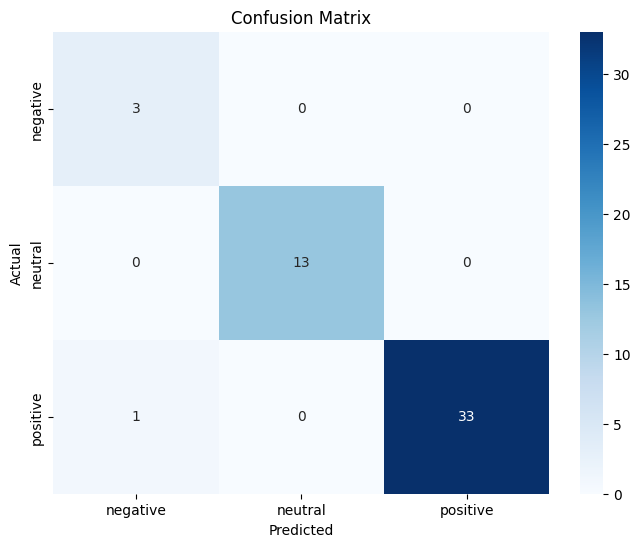

              precision    recall  f1-score   support

    negative       0.75      1.00      0.86         3
     neutral       1.00      1.00      1.00        13
    positive       1.00      0.97      0.99        34

    accuracy                           0.98        50
   macro avg       0.92      0.99      0.95        50
weighted avg       0.98      0.98      0.98        50



In [100]:
cm = confusion_matrix(df_test['sentiment'], y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(df_test['sentiment'], y_pred_test))
